<a href="https://colab.research.google.com/github/dondreojordan/DS-Unit-2-Linear-Models/blob/master/DS-Unit-2-Linear-Models/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [ ]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

apt = df.copy()

- [ ]  Look at the data. 
- [ ]  Choose a feature to plot its relationship with the target.


In [ ]:
apt.head(3)

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0          2         3  ...                 0                    0
1          1         2  ...                 0                    0
2          1         1  ...                 0                    0

[3 rows x 34 columns]

In [ ]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48818 entries, 0 to 49351
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   created               48818 non-null  object 
 3   description           47393 non-null  object 
 4   display_address       48685 non-null  object 
 5   latitude              48818 non-null  float64
 6   longitude             48818 non-null  float64
 7   price                 48818 non-null  int64  
 8   street_address        48808 non-null  object 
 9   interest_level        48818 non-null  object 
 10  elevator              48818 non-null  int64  
 11  cats_allowed          48818 non-null  int64  
 12  hardwood_floors       48818 non-null  int64  
 13  dogs_allowed          48818 non-null  int64  
 14  doorman               48818 non-null  int64  
 15  dishwasher         

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format
apt['price'].describe()

count   48,818
mean     3,580
std      1,762
min      1,375
25%      2,500
50%      3,150
75%      4,095
max     15,500
Name: price, dtype: float64

In [ ]:
import plotly.express as px
px.scatter(apt, x='latitude', y='price')

In [ ]:
px.scatter(df, x='latitude', y='price', trendline='ols')

-  [ ]  Use scikit-learn for linear regression with one feature. You can follow the 5-step process from Jake VanderPlas.

In [ ]:
# 1. Arrange X features matrix, or DataFrame & y target vector

y=apt['price']
X=apt[['latitude']]

In [ ]:
# 2. Create a train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print(y_train)

       latitude
14728        41
33051        41
24109        41
28424        41
47508        41
...         ...
11421        41
45216        41
38580        41
868          41
15980        41

[39054 rows x 1 columns]
14728    3167
33051    3105
24109    2250
28424    8000
47508    3150
         ... 
11421    1560
45216    6395
38580    2850
868      2200
15980    1995
Name: price, Length: 39054, dtype: int64


In [ ]:
# 3. Import the appropriate estimator from Scikit-Learn

from sklearn.linear_model import LinearRegression

In [ ]:
# 4. Instantiate this class

lr = LinearRegression()

In [ ]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
# 4. Fit the model to your training data

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 5. Apply the model to the new data

from sklearn.metrics import mean_absolute_error

print('Training MAE: ', mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE: ', mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE:  1198.9992416644686
Testing MAE:  1193.5630353740173


- [ ]  Define a function to make new predictions and explain the model coefficient.

In [ ]:
lr.coef_

array([-1677.78937233])

In [ ]:
lr.intercept_

71946.9438548299

In [ ]:
def predict(latitude):
  y_pred = lr.predict([[latitude]])
  estimate = y_pred[0]
  coefficent = lr.coef_[0]
  result = f'${estimate:,.0f} estimated price for {latitude:,.0f} longitude of apartments in New York City.'
  explanation = f'In this linear regression, each additional degree of longitude takes off ${coefficent:,.0f}'
  return result + '\n' + explanation


In [ ]:
# What does the model predict for a lower latitude? 
print(predict(40.00))

$10 estimated price for 40 longitude of apartments in New York City.
In this linear regression, each additional degree of longitude takes off $0


In [ ]:
# For a higher altitude
 print(predict(41.00))

$3,158 estimated price for 41 longitude of apartments in New York City.
In this linear regression, each additional degree of longitude takes off $-1,678


- [ ] Organize and comment your code.

## Stretch Goal Attempt:

In [ ]:
px.scatter(df, x='longitude', y='price', trendline='ols')

In [ ]:
# 1. Arrange X features matrix & y target vector

y = apt['price']
X = apt[['longitude']]

# 2. Create a train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Import the approriate estimatir class from Scikit-Learn

from sklearn.linear_model import LinearRegression

# 4. Instantiate this class
lr= LinearRegression()

# 5. Fit the model to your training data
lr.fit(X_train, y_train)

# 5. Look at your error metric for 
from sklearn.metrics import mean_absolute_error


print('Training MAE: ', mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE: ', mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE:  1144.8832265594747
Testing MAE:  1135.6702345579106


In [ ]:
px.scatter(df, x='bedrooms', y='bathrooms', trendline='ols')

In [ ]:
# 1. Arrange X features matrix & y target vector

y = apt['bathrooms']
X = apt[['bedrooms']]

# 2. Create a train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3. Import the approriate estimatir class from Scikit-Learn

from sklearn.linear_model import LinearRegression

# 4. Instantiate this class
lr= LinearRegression()

# 5. Fit the model to your training data
lr.fit(X_train, y_train)

# 5. Look at your error metric for 
from sklearn.metrics import mean_absolute_error


print('Training MAE: ', mean_absolute_error(y_train, lr.predict(X_train)))
print('Testing MAE: ', mean_absolute_error(y_test, lr.predict(X_test)))

Training MAE:  0.2891608269559434
Testing MAE:  0.29448898051341543


# **Dondre' After Hours Study Session DS 211 Notes**

Instructor: Ryan Allred


Synonyms for "y variable"

-Dependent VAriable

-Response Variable

-Predicted Variable 

-Label


Synonyms for "x variable(s)"

-Independent Variable 

-Explanatory Variable 

``
**Objectives:** Student should be able to explain how regression is the simplest model for “learning” y = f(x) Student should be able to use gradient descent to manually compute linear regression Student should be able to predict a vertex value v_i from v_0…v_i-1 via cubic regression Student should be able to predict a vertex value v_i from v_0…v_i-1 via linear regression Student should be able to use the matrix method to manually compute linear regression
``

#Code Example using Scikit-Learn

In [ ]:
# Linear REgression Example  

import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')

print(df.shape)
df.head(11)

(11, 2)


Farenheit  Dollars
0          32      200
1          35      400
2          47      500
3          55      600
4          73     1100
5          78     1200
6          81     1500
7          86     1700
8          89     1800
9          90     1600
10        110     2000

<function matplotlib.pyplot.show>

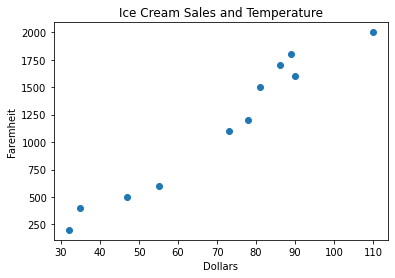

In [ ]:
# Visualize Data

plt.scatter(df.Farenheit, df.Dollars)
plt.ylabel("Faremheit")
plt.xlabel("Dollars")
plt.title("Ice Cream Sales and Temperature")
plt.show

In [ ]:
'''Parameters = Coefficients or Covariates(Slope and Y-intercept)'''

'Parameters = Coefficients or Covariates(Slope and Y-intercept)'

In [ ]:
import numpy as np

#Remember the convention of using a capital X for out x values and a lowercase y?
#This is because typically we will have more than one x variable 
#and our dataframe will bea ,atraix rather than a vector

X = df['Farenheit'].values[:, np.newaxis] #Matrix or Dataframe
y = df['Dollars'].values #np.array or vector

#Our data needs to have this shape to be accepted by skylearn
print(X.shape)
print(y.shape)

(11, 1)
(11,)


In [ ]:
# Fit Model, in this case its LinearRegression. 
#Greatest strength on Linear Regression


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

print('Slope Coefficient: ', model.coef_[0])
print('\nIntercept Value: ', model.intercept_)

Slope Coefficient:  24.68849397414572

Intercept Value:  -596.20648399428


``
Now we can use these estimated values to plot our line of best fit. The caret symbol  or "hat" indicated the "predicted values" or the estimated value. 
``

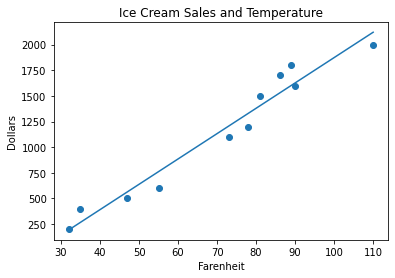

In [ ]:
m_hat = model.coef_[0]
b_hat = model.intercept_

#Plot the points
plt.scatter(df.Farenheit, df.Dollars)

#Plot the line (matplotlib)
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

#Graph axes and the title
plt. ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show;

# Making predictions

Prediction [array([193.82532318]), array([267.8908051]), array([564.15273279]), array([761.66068458]), array([1206.05357612]), array([1329.49604599]), array([1403.56152791]), array([1527.00399778]), array([1601.0694797]), array([1625.75797368]), array([2119.52785316])]


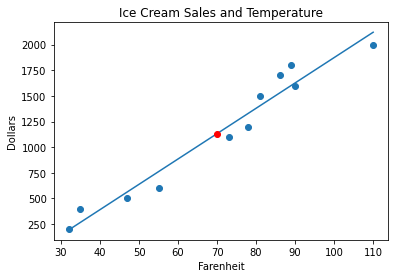

In [ ]:
#Make a single prediction for 70 degrees farneheit
X_value = 70

#Plug our temperature into our equation (model)
prediction = m_hat*X_value + b_hat
print("Prediction", y_hat)

#Plot the points
plt.scatter(df.Farenheit, df.Dollars)

#Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X,y_hat)
plt.plot(X_value, prediction, 'ro')

#Graph axes and title)
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show;

####Predicted Value
``
Points that represent our predictions that lie on the line of best fir are called "predicted values" or "fitted values". We a"approxiate the variants. 
``
####Residual Error
``
The residual error is the distance between the red(predicted value) and the blue dot (observed value). This is caused by the random error that we can't account for. This omitted variable represents all the things that you factors that aren't accounted for.
``

Prediction [array([193.82532318]), array([267.8908051]), array([564.15273279]), array([761.66068458]), array([1206.05357612]), array([1329.49604599]), array([1403.56152791]), array([1527.00399778]), array([1601.0694797]), array([1625.75797368]), array([2119.52785316])]


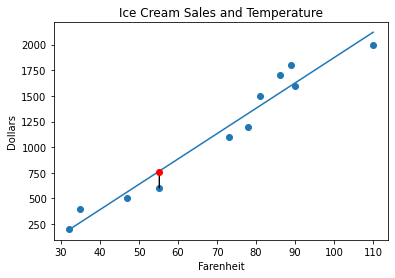

In [ ]:
#Make a single prediction for 55 degrees farneheit
X_value = 55

#Plug our temperature into our equation (model)
prediction = m_hat*X_value + b_hat
print("Prediction", y_hat)

b_hat = model.intercept_

#Plot the points
plt.scatter(df.Farenheit, df.Dollars)

#Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X,y_hat)
plt.plot(X_value, prediction, 'ro')

#Graph axes and title)
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")

#PLot the error
plt.arrow(55.2,600, 0, 150, color='black')
plt.show()

#Multiple Regression

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
apt = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]


In [ ]:
print(apt.shape)
apt.head()

(48818, 34)


bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]

In [ ]:
apt.describe().columns

Index(['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

#The Scikit-Learn code is the same every time.
y1 = apt.loc[:, ['price']].values
X1 = apt.loc[:, ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space']].values
print(y1.shape)
print(X1.shape)

model = LinearRegression()
model.fit(X1, y1)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ",beta_0)

(48818, 1)
(48818, 28)
Slope Coefficients:  [ 1.79090878e+03  4.78808051e+02  1.73846495e+03 -1.37175719e+04
  1.41168185e+02 -3.91212322e+01 -2.30342108e+02  1.01786013e+02
  4.86518660e+02  4.76830027e+01 -1.70073609e+02 -2.73938335e+02
  1.48488026e+02 -6.33504405e+01  4.55734165e+02 -1.71929805e+02
 -1.21915788e+02  2.45761206e+02 -3.29248695e+02 -7.62871187e+00
  6.77224300e+01 -1.51842616e+02  1.45871152e+02  1.00168583e+02
  1.41005568e+02  5.67885917e+01  2.01894760e+02 -6.85885592e+01]

Intercept Value:  [-1085103.0473894]


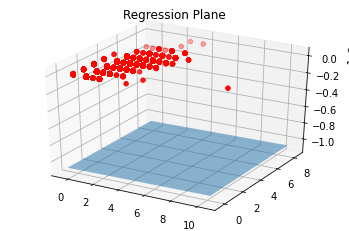

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Plot ponots on 3D plot
ax.scatter(apt['bathrooms'], apt['bedrooms'], apt['price'], c='red')

#Set axes to sixe of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

#Plot Plane
plt3d = plt.gca(projection='3d')

#Add Opacity to Plane
plt3d.plot_surface(xx, yy, zz, alpha=0.5)
plt.title("Regression Plane")

plt.show()


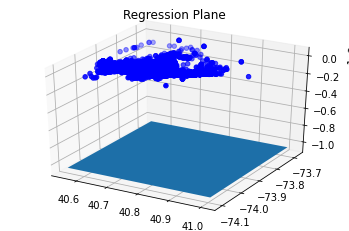

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', alpha=0.5
                     )

#Plot ponots on 3D plot
ax.scatter(apt['latitude'], apt['longitude'], apt['price'], c='blue')

#Set axes to sixe of scatter data
x2 = np.array(ax.get_xlim())
y2 = np.array(ax.get_ylim())
xx2, yy2 = np.meshgrid(x2,y2)
zz2 = beta_i[0]*xx2 + beta_i[1]*yy2 + beta_0[0]

#Plot Plane
plt3d = plt.gca(projection='3d')

#Add Opacity to Plane
plt3d.plot_surface(xx2, yy2, zz2)
plt.title("Regression Plane")

plt.show()

#Basic Model Validation

###**R^2**
``
Range is 0 to 1. A percentage of y variable that is explained or determined by the x variable. Look for a higher R^2. A measure of goodness of fit is another name.
``

Steps of Basic Validation

1) Split your labeled data into two halves.

2) Fit your linear regression model to one of your two halves. (training dataset)

3) Run the second half (testing dataset) through your model and make predictions. 

4) Compare your predictions with the true values via some measure of "accuracy". (Root Mean Squared Error)

In [ ]:
import seaborn as sns
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(apt)

In [ ]:
sns.set(style='ticks', color_codes=True)

#Generate a list of column headers not including price
x_columns = apt.columns.drop(['price', 'created', 'description', 'display_address', 'street_address',
       'interest_level'])

#Only plot the scatterplot of x variable with our y variable
fig = sns. pairplot(data=apt, y_vars=['price'], x_vars=x_columns)

In [ ]:
apt.describe()

In [ ]:
 from sklearn.model_selection import train_test_split

 price = apt['price']
 noprice = apt.drop(['price', 'created', 'description', 'display_address', 'street_address',
       'interest_level'], axis=1)

 #Split data into training data and testing data. "Split train/test question."

 X_train, X_test, Y_train, Y_test = train_test_split(noprice, price, test_size=.25)

 print(X_train.shape)
 print(X_test.shape)
 print(Y_train.shape)
 print(Y_test.shape)

In [ ]:
''' 75% of all data in training and 25% in testing.'''

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model =LinearRegression()
model.fit(X_train, Y_train)

Y_test_predict = model.predict(X_test)
print(Y_test_predict)

RSME = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
R2 = r2_score(Y_test, Y_test_predict)

print("RMSE:", RSME) # We want as low as possible
print("R^2:", R2) #We want as high as possible

In [ ]:
[2750.01564982 3127.06285364 2356.8795143  ... 3430.03629834 5928.9819409
 2001.99947311]
RMSE: 1105.4431442749028
R^2: 0.6219035768419421